Names: Adrian Gallardo, Nathan Cheng, Carl Song, Raymond Wang


---



**Introduction:**

This dataset contains 129,880 records of passengers detailing their flight experiences. Such experiences put into consideration for passenger satisfaction are onboard services or inflight experiences. There are 22 features that we looked into to determine customer satisfaction, and these are listed below in the next section.


In other words, our goal is to predict passenger satisfaction based on their flight using various features the passengers may have experienced. Because we are working with a labeled dataset, we primarily used supervised learning classifications that lead to a strong and accurate conclusion. That dataset can be found here: https://www.kaggle.com/datasets/johndddddd/customer-satisfaction

We believe this problem is relevant as air travel remains to be a convenient transportation option, but we can always aim to improve customer satisfaction. Additionally, airlines are in the business of retaining customers, and in order for this to occur they must have great experiences. While not all customers will be satisfied with everything, we can still apply machine learning to help us learn what factors go into overall customer satisfaction.

The results of our predictive model can help airlines see what factors they should focus on during the whole airline experience. (E.g. if they see how low levels of food and drinks can be attributed to a customer being not satisfied, then they can focus on improving food and drinks)

**Dataset Areas to Know:**

*Class Label:*

satisfaction_v2: satisfied or netural/dissatisfied





*Features:*

Age: The actual age of the passengers

Gender: Gender of the passengers (Female, Male)

Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

Customer Type: The customer type (Loyal customer, disloyal customer)

Flight distance: The flight distance of this journey in miles


0-5 experience level. 5 being the best and 0 being the worst:

Inflight wifi service: Satisfaction level of the inflight wifi service

Ease of Online booking: Satisfaction level of online booking

Inflight service: Satisfaction level of inflight service

Online boarding: Satisfaction level of online boarding

Inflight entertainment: Satisfaction level of inflight entertainment

Food and drink: Satisfaction level of Food and drink

Seat comfort: Satisfaction level of Seat comfort

On-board service :Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

Baggage handling: Satisfaction level of baggage handling

Gate location: Satisfaction level of Gate location

Cleanliness: Satisfaction level of Cleanliness

Check-in service: Satisfaction level of Check-in service


*In minutes:*

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when Arrival



A sample of the dataset is shown below.




In [ ]:
import pandas as pd

init_data = pd.read_excel('satisfaction.xlsx')
print(init_data.head())
print(init_data.shape)

       id satisfaction_v2  Gender   Customer Type  Age   Type of Travel  \
0   11112       satisfied  Female  Loyal Customer   65  Personal Travel   
1  110278       satisfied    Male  Loyal Customer   47  Personal Travel   
2  103199       satisfied  Female  Loyal Customer   15  Personal Travel   
3   47462       satisfied  Female  Loyal Customer   60  Personal Travel   
4  120011       satisfied  Female  Loyal Customer   70  Personal Travel   

      Class  Flight Distance  Seat comfort  Departure/Arrival time convenient  \
0       Eco              265             0                                  0   
1  Business             2464             0                                  0   
2       Eco             2138             0                                  0   
3       Eco              623             0                                  0   
4       Eco              354             0                                  0   

   ...  Online support  Ease of Online booking  On-board servi

**Data Cleaning**:

With the help of Kaggle and the Pandas framework, we were able to determine 393 records with missing data in the Arrival Delay in Minutes column. We decided to drop these 393 records with missing data since we would have had a lower risk of skewing our data and we have a lot of rows to work with.

In [ ]:
print(init_data.isnull().sum())
missing = init_data['Arrival Delay in Minutes'].isnull().sum()
print("Records missing data in Arrival Delay in Minutes Column", missing)
init_data = init_data.dropna()
missing = init_data['Arrival Delay in Minutes'].isnull().sum()
print("Records missing data in Arrival Delay in Minutes Column after dropping records", missing)

id                                     0
satisfaction_v2                        0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64
Rec

**Data Exploration / Feature Engineering:**

Since we are using supervised learning models, we will need to separate  our data labels. The satisfaction_v2 column contains satisfied, neutral/dissatisfied votes. Because this column is a categorical feature, we can easily one-hot encode them.

In addition to satisfaction_v2, we had 4 other categorical features to one-hot encode.
1. Gender: Female or Male
2. Customer Type: Loyal Customer or disloyal Customer
3. Type of Travel: Business Travel or Personal Travel
4. Class: Business, Eco, or Eco Plus
5. Satisfaction (Class label): Satisfied or Neutral/Dissatisfied  

All columns were hot-encoded accordingly as shown below. The id column was not necessary for our testing, so it was removed from our data features.


In [ ]:
data = init_data.drop(['id'],axis=1)
data = pd.get_dummies(data, columns=['satisfaction_v2'], drop_first=True)
data = pd.get_dummies(data, columns=['Gender', 'Customer Type', 'Type of Travel', 'Class'])
print(data.head())

   Age  Flight Distance  Seat comfort  Departure/Arrival time convenient  \
0   65              265             0                                  0   
1   47             2464             0                                  0   
2   15             2138             0                                  0   
3   60              623             0                                  0   
4   70              354             0                                  0   

   Food and drink  Gate location  Inflight wifi service  \
0               0              2                      2   
1               0              3                      0   
2               0              3                      2   
3               0              3                      3   
4               0              3                      4   

   Inflight entertainment  Online support  Ease of Online booking  ...  \
0                       4               2                       3  ...   
1                       2               

**Data Exploration:**

Checking for outliers in the columns:

 - Flight Distance

 - Departure Delay in Minutes

 - Arrival Delay in Minutes

Number of Flight Distance suspected outliers 2994


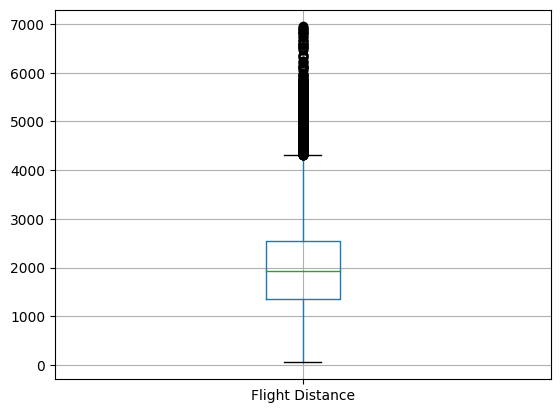

In [ ]:
data.boxplot(column=['Flight Distance'])
print('Number of Flight Distance suspected outliers' , data[data['Flight Distance'] > 4200].shape[0])

We know flights can go long distances. While 7,000 miles is highly unlikely it is still possible so we will leave this data in the dataset. Out of a total of 129,880 it wouldn't make much of a difference anyway.

Checking data in Departure Delay in Minutes.

<Axes: >

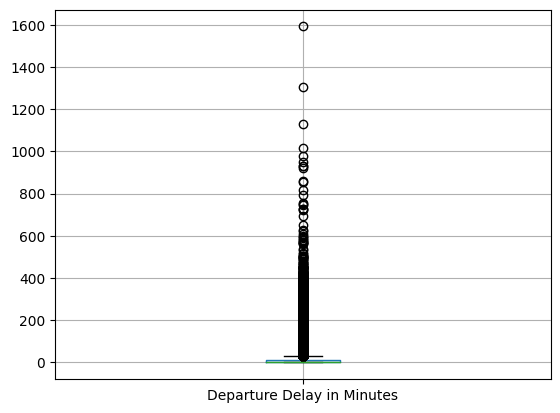

In [ ]:
data.boxplot(column=['Departure Delay in Minutes'])

We determined the highest three data points was above 1100 minutes so we went ahead and dropped them from the dataset. They are gone below.

<Axes: >

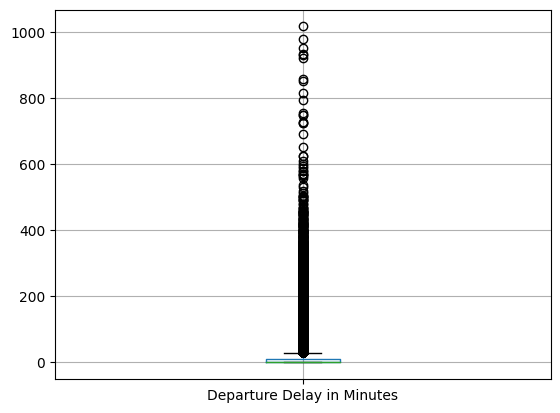

In [ ]:
data = data[data['Departure Delay in Minutes'] < 1100]
data.boxplot(column=['Departure Delay in Minutes'])

There was no egreious outliers but we will go ahead and get rid of the top three records since the departure delay in minutes is out of the norm. Again, with this many records it shouldn't make much of a difference.

Checking data in Arrival Delay in Minutes.

<Axes: >

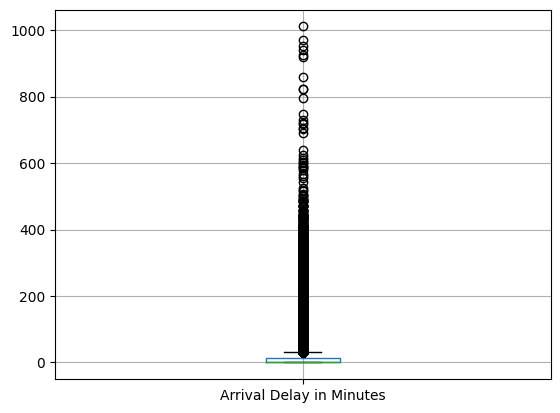

In [ ]:
data.boxplot(column=['Arrival Delay in Minutes'])

We have a suspicion that Arrival Delay in Minutes and Departure Delay in minutes are related to one another. As we can see most of the data appears fine because flights can be delayed for a long time. We decided not to take any records out due to this column.


**Data Exploration:** We wanted to see if there were any strong correlations between being satisfied with an airline experience in comparison to the features.

In [ ]:
pd.set_option('display.max_columns', None)
print(data.corr())

                                        Age  Flight Distance  Seat comfort  \
Age                                1.000000        -0.249429      0.008466   
Flight Distance                   -0.249429         1.000000     -0.042457   
Seat comfort                       0.008466        -0.042457      1.000000   
Departure/Arrival time convenient  0.038927         0.001388      0.434951   
Food and drink                     0.015487        -0.004786      0.716005   
Gate location                     -0.000820        -0.002302      0.405355   
Inflight wifi service              0.014031         0.012305      0.129152   
Inflight entertainment             0.130233        -0.027358      0.426497   
Online support                     0.121270        -0.031857      0.120148   
Ease of Online booking             0.071739        -0.022313      0.211573   
On-board service                   0.066518        -0.032438      0.121190   
Leg room service                   0.083683        -0.030243    

As we can see, some of the highest features correlating with customer satisfaction was inflight entertainment, ease of online booking, online support, and on-board service.

**Data Exploration/Data Cleaning:** After we reviewed our correlation data, we realized there were too many columns to keep track. As a result, we decided to  view just the columns with a positive correlation of 0.6 or higher.

In [ ]:
correlation_matrix = data.corr()

print("Correlations greater than 0.6:")
for col in correlation_matrix.columns:
    high_correlations = correlation_matrix.index[(correlation_matrix[col] > 0.6) & (correlation_matrix[col] < 1.0)].tolist()
    for feature in high_correlations:
        print(f"{col} - {feature}: {correlation_matrix.loc[feature, col]}")

Correlations greater than 0.6:
Seat comfort - Food and drink: 0.716005330079167
Food and drink - Seat comfort: 0.716005330079167
Inflight wifi service - Ease of Online booking: 0.6010839726286293
Inflight wifi service - Online boarding: 0.6317893175015127
Online support - Ease of Online booking: 0.6176595422649229
Online support - Online boarding: 0.6698707805057618
Ease of Online booking - Inflight wifi service: 0.6010839726286293
Ease of Online booking - Online support: 0.6176595422649229
Ease of Online booking - Online boarding: 0.6843491483088882
Baggage handling - Cleanliness: 0.63206068953451
Cleanliness - Baggage handling: 0.63206068953451
Online boarding - Inflight wifi service: 0.6317893175015127
Online boarding - Online support: 0.6698707805057618
Online boarding - Ease of Online booking: 0.6843491483088882
Departure Delay in Minutes - Arrival Delay in Minutes: 0.9642930721244563
Arrival Delay in Minutes - Departure Delay in Minutes: 0.9642930721244563


After reviewing these correlations, we noticed there was a lot of correlation values between 0.6 to 0.7, so we decided not to intervene with those features. However, we did discover an outlier of 0.96 between the columns 'Departure Delay in Minutes' and 'Arrival Delay in Minutes'. This makes sense because if our departure time was delayed, then our arrival time would also be delayed as well. Therefore, we decided to drop one of the columns (Arrival Delay in Minutes).

In [ ]:
data = data.drop(['Arrival Delay in Minutes'],axis=1)

Data preparation for supervised learning techniques. Labels and features separated.

In [ ]:
from numpy import ravel
print(data.shape)
data_labels_transformed = data['satisfaction_v2_satisfied']
data_features_transformed = data.drop(['satisfaction_v2_satisfied'],axis=1)

print(data_labels_transformed)

print(data_features_transformed.head())
print(data_features_transformed.shape)

data_labels_transformed_ravel = ravel(data_labels_transformed)

(129484, 27)
0         1
1         1
2         1
3         1
4         1
         ..
129875    1
129876    0
129877    0
129878    0
129879    0
Name: satisfaction_v2_satisfied, Length: 129484, dtype: uint8
   Age  Flight Distance  Seat comfort  Departure/Arrival time convenient  \
0   65              265             0                                  0   
1   47             2464             0                                  0   
2   15             2138             0                                  0   
3   60              623             0                                  0   
4   70              354             0                                  0   

   Food and drink  Gate location  Inflight wifi service  \
0               0              2                      2   
1               0              3                      0   
2               0              3                      2   
3               0              3                      3   
4               0              3         

**Modeling:**

We went ahead and tested our data on a decision tree. We used a grid search to find the best parameters and model to conduct a nested cross validation. We ended up with an average of about 73 to 75 percent.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

clf = DecisionTreeClassifier(criterion='entropy')

params = {"max_depth": [10,20,30,40,50]}

grid_search = GridSearchCV(clf, params, cv=5, scoring='accuracy')

nested_score = cross_val_score(grid_search, data_features_transformed, data_labels_transformed, cv=5)

print("Average Nested Cross Validation Decision Tree Accuracy:", nested_score.mean()*100)

Average Nested Cross Validation Decision Tree Accuracy: 75.18838271869278


**Modeling:**

Naive Bayes classifer. Another model to see accuracy. Typically around 70%

In [ ]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()

scores = cross_val_score(clf, data_features_transformed, data_labels_transformed_ravel, cv=5)
accuracy = scores.mean()
print("Average Naive Bayes Accuracy:", accuracy*100)

Average Naive Bayes Accuracy: 70.24729170856018


**Modeling:**

Random forest classifer. A more complex model to test accuracy. Typically around 74%.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
param_grid = [
  {'n_estimators': [50, 100, 150]}
    ]
grid_search = GridSearchCV(clf, param_grid, cv=5)

scores = cross_val_score(grid_search, data_features_transformed, data_labels_transformed_ravel, cv=5)
accuracy = scores.mean()
print('Average Ensemble Random Forest Accuracy:', accuracy *100)

Average Ensemble Random Forest Accuracy: 74.94354262004815


**Modeling:**

AdaBoost classifer to see how adjusting weight will affect accuracy. Typically around 78%

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict

clf = AdaBoostClassifier()
param_grid = [
  {'n_estimators': [50, 100, 150]}
    ]

grid_search = GridSearchCV(clf, param_grid, cv=5)
y_pred = cross_val_predict(grid_search, data_features_transformed, data_labels_transformed_ravel, cv=5)
accuracy = accuracy_score(data_labels_transformed_ravel, y_pred)
print('Average AdaBoost Accuracy:', accuracy *100 )
class_report = classification_report(data_labels_transformed_ravel, y_pred)
print("Classification Report:\n", class_report)

Average AdaBoost Accuracy: 78.30079392048438
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.75      0.76     58603
           1       0.80      0.81      0.80     70881

    accuracy                           0.78    129484
   macro avg       0.78      0.78      0.78    129484
weighted avg       0.78      0.78      0.78    129484



**Data Exploration / Feature Engineering:**

After trying several other models, we ran into a roadblock of improving our accuracy further. **We decided to go back to square one and explore our dataset some more to make up for our lack of feature engineering.** We failed to notice an important feature called 'Customer Type' that stated whether a customer was loyal or disloyal to the airline. We found that 82% of the records were loyal customers, and only 18% were disloyal customers. It was at this point that we realized the possibility of bias taking place in the data set, and we decided to investigate.

First, we wanted to contrast customer satisfaction between loyal and disloyal customers.

Second, if there was a huge gap between these percentages, then we wanted to see what would happen if we did a 50/50 split of data between disloyal and loyal before we modeled the data.

In [ ]:
# Separate the loyal and disloyal customers
print(data.shape)
loyal_customers = data[data['Customer Type_Loyal Customer'] == 1]
disloyal_customers = data[data['Customer Type_disloyal Customer'] == 1]

# Randomly sample the loyal customers to match the number of disloyal customers
num_disloyal = len(disloyal_customers)
balanced_loyal_customers = loyal_customers.sample(n=num_disloyal)

loyal_satisfied = balanced_loyal_customers[balanced_loyal_customers['satisfaction_v2_satisfied']==1]
disloyal_satisfied = disloyal_customers[disloyal_customers['satisfaction_v2_satisfied']==1]
print('How likely to be satisfied if loyal customer: ',len(loyal_satisfied)/len(balanced_loyal_customers) * 100)
print('How likely to be satisfied if disloyal customer: ',len(disloyal_satisfied)/len(disloyal_customers) * 100)




(129484, 27)
How likely to be satisfied if loyal customer:  61.49953613898963
How likely to be satisfied if disloyal customer:  23.985831154592223


We discovered that loyal customers leaned towards being more satisfied with a 60% versus disloyal customers having a 24% airline satisfaction rating. With this knowledge, we confirmed our initial hypothesis of existing bias.

As a result, we went ahead and did a 50/50 split on loyal/disloyal customers before modeling our data.

In [ ]:
# Concatenate the balanced data to create a new DataFrame
data = pd.concat([balanced_loyal_customers, disloyal_customers])

# Shuffle the new DataFrame
data = data.sample(frac=1).reset_index(drop=True)
print(data.head())
print(data.shape)


data_labels = data['satisfaction_v2_satisfied']
data_features = data.drop(['satisfaction_v2_satisfied'],axis=1)

data_labels_ravel = ravel(data_labels)

   Age  Flight Distance  Seat comfort  Departure/Arrival time convenient  \
0   36             2035             4                                  4   
1   39             1915             2                                  2   
2   28             2642             3                                  3   
3   59             1347             2                                  2   
4   58             2250             3                                  3   

   Food and drink  Gate location  Inflight wifi service  \
0               4              3                      4   
1               2              3                      1   
2               3              2                      1   
3               2              2                      4   
4               3              4                      4   

   Inflight entertainment  Online support  Ease of Online booking  \
0                       4               4                       4   
1                       2               1         

**Modeling:**

We tried the basic decision tree model again to see if we improved our accuracy. Our accuracy ended up improving to the lower end of the 90% range.

In [ ]:
clf = DecisionTreeClassifier(criterion='entropy')

params = {"max_depth": [10,20,30,40,50]}

grid_search = GridSearchCV(clf, params, cv=5, scoring='accuracy')

nested_score = cross_val_score(grid_search, data_features, data_labels, cv=5)

print("Average Nested Cross Validation Decision Tree Accuracy:", nested_score.mean()*100)

Average Nested Cross Validation Decision Tree Accuracy: 93.54388938847372


**Modeling:**

As seen above our accuracy is improving. Let's see if this trend continue. We then used Naive Bayes to see if another model would confirm our accuracy. Our Naive Bayes accuracy also improved to the lower end of the 80% range. Traditionally this model is low on accuracy.

In [ ]:
data_labels_transformed_ravel = ravel(data_labels_transformed)
clf = GaussianNB()

scores = cross_val_score(clf, data_features, data_labels_ravel, cv=5)
accuracy = scores.mean()
print("Average Naive Bayes Accuracy:", accuracy*100)

Average Naive Bayes Accuracy: 82.02960454109828


**Modeling:**

Random forest classifier again. Typically around 95%. This turns out to be the highest accuracy model yet.

In [ ]:
clf = RandomForestClassifier()
param_grid = [
  {'n_estimators': [50, 100, 150]}
    ]
grid_search = GridSearchCV(clf, param_grid, cv=5)

scores = cross_val_score(grid_search, data_features, data_labels_ravel, cv=5)
accuracy = scores.mean()
print('Average Ensemble Random Forest Accuracy:', accuracy *100)

Average Ensemble Random Forest Accuracy: 94.81107569004668


**Modeling:**

AdaBoost classifer again. This model had the highest accuracy on the previous dataset. Typically around 90% accuracy.

In [ ]:
clf = AdaBoostClassifier()
param_grid = [
  {'n_estimators': [50, 100, 150]}
    ]

grid_search = GridSearchCV(clf, param_grid, cv=5)
y_pred = cross_val_predict(grid_search, data_features, data_labels_ravel, cv=5)
accuracy = accuracy_score(data_labels_ravel, y_pred)
print('Average AdaBoost Accuracy:', accuracy *100)
class_report = classification_report(data_labels_ravel, y_pred)
print("Classification Report:\n", class_report)

Average AdaBoost Accuracy: 90.65109218183352
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92     27156
           1       0.90      0.88      0.89     20272

    accuracy                           0.91     47428
   macro avg       0.91      0.90      0.90     47428
weighted avg       0.91      0.91      0.91     47428



**Modeling:**

Since we knew this modified dataset was achieving higher results, we wanted to try the knn model, which requires scaling and reducing the dimensionality. This model takes a while to run since it tests many parameters. About 90% accuracy, which aligns with most of our other models.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline


scaler = StandardScaler()
pca = PCA()
neigh = KNeighborsClassifier()
pipe = Pipeline(steps=[('scaler',scaler), ('pca',pca), ('knn',neigh)])

param_grid = {
    'pca__n_components': list(range(10, 20)),
    'knn__n_neighbors': list(range(10, 20))
}

clf = GridSearchCV(pipe, param_grid, cv=5)
nested_score = cross_val_score(clf, data_features, data_labels_ravel, cv=5)
print("Average KNN Accuracy:", nested_score.mean()*100)


Average KNN Accuracy: 90.33481430504195


**Results/Conclusions**

Modeling Results Approximate:

Without a 50/50 split on loyal/disloyal customers:

Decision Tree: 74%

Naive Bayes: 70%

Random Forest: 74%

AdaBoost: 78%




With a 50/50 split on loyal/disloyal customers:

Decision Tree: 93%

Naive Bayes: 82%

Random Forest: 95%

Adaboost: 90%

KNN: 90%




In conclusion, we tried the same 4 models on two separate datasets. We were able to perform data cleaning on values that were missing in the 'Arrival Delay in Minutes' column and got rid of egregious outliers in the continuous values of the features 'Arrival Delay in Minutes''. Since our dataset was large, we realized that most of these actions wouldn't have affected our results drastically. The one-hot encoding scheme was used for our categorial features since supervised learning models were used. After splitting our data labels and features, we started testing models with our initial dataset but became unsatisfied with our results. Out of the 4 models, AdaBoost came in first with random forest and decision trees tying, and Naive Bayes came in last. It appears adjusting the weights based on each instance worked best with our data.


However, we still weren't satisfied with the results, so we investigated our customer loyalty column. We began sampling the loyal and disloyal customers and discovered that loyal customers were more likely to be satisfied with their flight experience (60%) versus disloyal customers (24%).  Following this, we did a 50/50 split between loyal and disloyal customers and it greatly improved the accuracy of all the models. Note, this new dataset did include only about 47,000 rows-- which was still a lot to work with. From the models that we tested, we concluded that the Random Forest model with the 50/50 split on customer loyalty would ultimately be the final model selected since it yielded a final accuracy of 95%.
